In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
import glob

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
model = "Multimodel"
print(model)
experiment = "ssp585"
print(experiment)

Multimodel
ssp585


In [5]:
variable = "epc100"
print(variable)

epc100


### Timeseries

In [8]:
files=glob.glob("csv/*_{}_whole.csv".format(variable))
files

['csv/ACCESS-ESM1-5_epc100_whole.csv',
 'csv/CMCC-ESM2_epc100_whole.csv',
 'csv/EC-Earth3-CC_epc100_whole.csv',
 'csv/IPSL-CM6A-LR_epc100_whole.csv',
 'csv/MPI-ESM1-2-HR_epc100_whole.csv']

In [9]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)
type(df)

     Year     Annual     Summer    Winter          Model
0    2015  10.014500  27.916971  0.295388  ACCESS-ESM1-5
1    2016   9.897537  27.555046  0.276833  ACCESS-ESM1-5
2    2017   8.903943  24.539703  0.253819  ACCESS-ESM1-5
3    2018   9.639710  26.588690  0.265886  ACCESS-ESM1-5
4    2019   8.861773  24.678904  0.274101  ACCESS-ESM1-5
..    ...        ...        ...       ...            ...
425  2096  17.549166  52.322662  0.282213  MPI-ESM1-2-HR
426  2097  16.332424  48.090984  0.305195  MPI-ESM1-2-HR
427  2098  16.531553  49.105480  0.310809  MPI-ESM1-2-HR
428  2099  16.547178  48.732895  0.313749  MPI-ESM1-2-HR
429  2100  16.270422  48.919498  0.291079  MPI-ESM1-2-HR

[430 rows x 5 columns]


pandas.core.frame.DataFrame

#### Annual

In [10]:
Annual = df.drop(columns=["Summer", "Winter"])
Annual

,Year,Annual,Model
0,2015,10.014500,ACCESS-ESM1-5
1,2016,9.897537,ACCESS-ESM1-5
2,2017,8.903943,ACCESS-ESM1-5
3,2018,9.639710,ACCESS-ESM1-5
4,2019,8.861773,ACCESS-ESM1-5
...,...,...,...
425,2096,17.549166,MPI-ESM1-2-HR
426,2097,16.332424,MPI-ESM1-2-HR
427,2098,16.531553,MPI-ESM1-2-HR
428,2099,16.547178,MPI-ESM1-2-HR


In [11]:
Annual = Annual.pivot(index="Year", columns="Model", values="Annual")

In [12]:
Mean = {"Multimodel Mean": Annual.mean(axis=1)}
Mean = pd.DataFrame(Mean)
Mean

,Multimodel Mean
Year,
2015,17.711475
2016,18.131488
2017,17.974893
2018,17.703275
2019,17.627375
...,...
2096,20.069768
2097,19.761057
2098,19.846275


In [13]:
Annual

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,10.014500,26.617071,18.228113,17.567694,16.129995
2016,9.897537,27.178505,18.625845,18.053415,16.902136
2017,8.903943,27.211540,18.559433,18.808956,16.390593
2018,9.639710,25.798775,18.548100,18.837720,15.692071
2019,8.861773,26.138102,18.267197,18.442688,16.427114
...,...,...,...,...,...
2096,12.836106,29.577513,21.616670,18.769386,17.549166
2097,12.359749,30.831055,20.536116,18.745940,16.332424
2098,12.514877,31.126158,20.253645,18.805141,16.531553


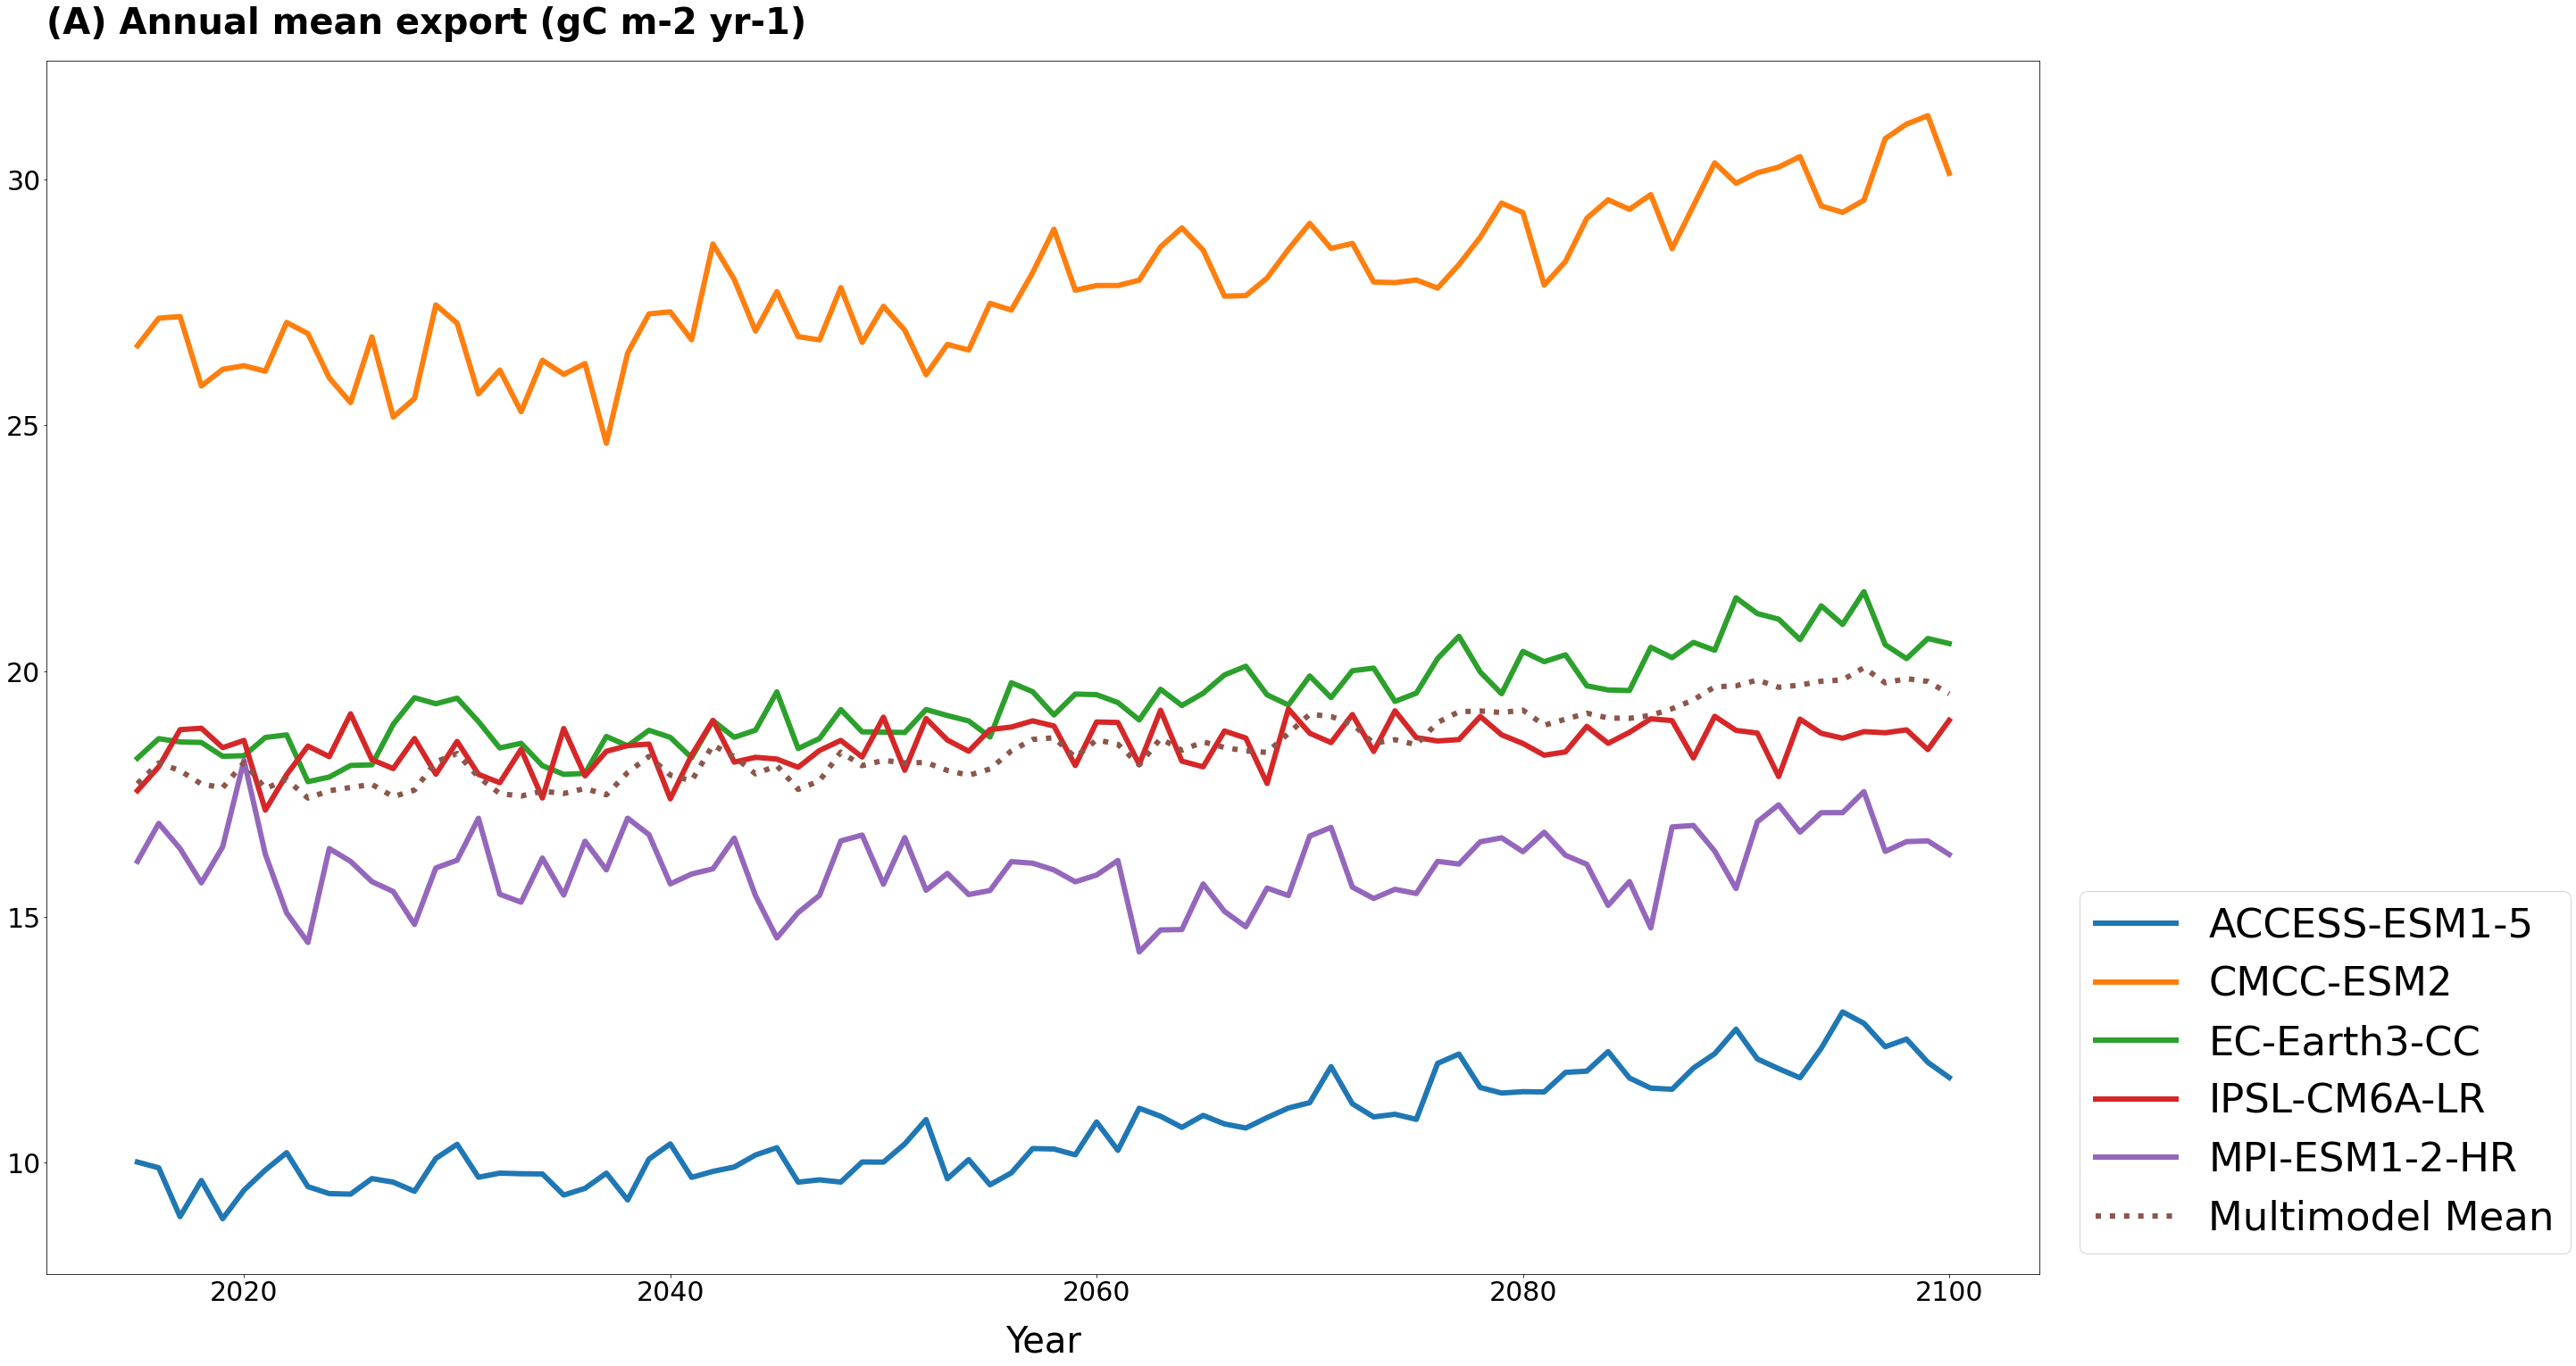

In [47]:
fig,ax = plt.subplots(figsize=(40,25))

plt.title("(A) Annual mean export (gC m-2 yr-1)", fontweight="bold", fontsize = 40, pad = 30, loc = "left")
ax.TitleHorizontalAlignment = 'left'

ax = Annual.plot.line(ax = ax, linewidth = 6)
ax2 = Mean.plot.line(ax = ax, linewidth = 6, linestyle = ":")
ax.legend(loc='lower left', bbox_to_anchor=(1.01, 0), prop={'size':45})

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
    
ax.set_xlabel('Year', fontsize = 40, labelpad=20)

plt.savefig("output/{}/{}_{}_{}_mean_projection_whole.png".format(model, variable, model, experiment), bbox_inches='tight')

plt.show()

#### Season

In [15]:
Summer = df.drop(columns=["Annual", "Winter"])
Summer

,Year,Summer,Model
0,2015,27.916971,ACCESS-ESM1-5
1,2016,27.555046,ACCESS-ESM1-5
2,2017,24.539703,ACCESS-ESM1-5
3,2018,26.588690,ACCESS-ESM1-5
4,2019,24.678904,ACCESS-ESM1-5
...,...,...,...
425,2096,52.322662,MPI-ESM1-2-HR
426,2097,48.090984,MPI-ESM1-2-HR
427,2098,49.105480,MPI-ESM1-2-HR
428,2099,48.732895,MPI-ESM1-2-HR


In [16]:
Summer = Summer.pivot(index="Year", columns="Model", values="Summer")

In [17]:
Summer_Mean = {"Multimodel Mean": Summer.mean(axis=1)}
Summer_Mean = pd.DataFrame(Summer_Mean)
Summer_Mean

,Multimodel Mean
Year,
2015,38.098599
2016,39.063451
2017,38.691460
2018,38.296919
2019,38.443955
...,...
2096,43.388318
2097,42.092028
2098,42.318593


In [18]:
Summer

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,27.916971,31.965164,39.710484,42.156143,48.744232
2016,27.555046,32.523975,39.634823,44.074783,51.528625
2017,24.539703,33.045746,40.809185,45.079586,49.983078
2018,26.588690,31.675348,40.730869,45.355335,47.134354
2019,24.678904,32.613834,40.124111,44.600185,50.202740
...,...,...,...,...,...
2096,36.665394,39.859600,44.834564,43.259369,52.322662
2097,35.284687,42.036739,42.127014,42.920715,48.090984
2098,35.053848,42.480850,42.310440,42.642345,49.105480


In [19]:
Winter = df.drop(columns=["Annual", "Summer"])
Winter

,Year,Winter,Model
0,2015,0.295388,ACCESS-ESM1-5
1,2016,0.276833,ACCESS-ESM1-5
2,2017,0.253819,ACCESS-ESM1-5
3,2018,0.265886,ACCESS-ESM1-5
4,2019,0.274101,ACCESS-ESM1-5
...,...,...,...
425,2096,0.282213,MPI-ESM1-2-HR
426,2097,0.305195,MPI-ESM1-2-HR
427,2098,0.310809,MPI-ESM1-2-HR
428,2099,0.313749,MPI-ESM1-2-HR


In [20]:
Winter = Winter.pivot(index="Year", columns="Model", values="Winter")

In [21]:
Winter_Mean = {"Multimodel Mean": Winter.mean(axis=1)}
Winter_Mean = pd.DataFrame(Winter_Mean)
Winter_Mean

,Multimodel Mean
Year,
2015,5.532207
2016,5.579106
2017,5.576502
2018,5.333688
2019,5.235965
...,...
2096,5.415167
2097,5.606660
2098,5.636078


In [22]:
Winter

Model,ACCESS-ESM1-5,CMCC-ESM2,EC-Earth3-CC,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,0.295388,20.634682,3.225622,3.176339,0.329006
2016,0.276833,20.921610,3.267078,3.099838,0.330173
2017,0.253819,20.830933,3.269139,3.176675,0.351947
2018,0.265886,19.673355,3.228569,3.153737,0.346893
2019,0.274101,19.160204,3.253040,3.161536,0.330942
...,...,...,...,...,...
2096,0.253127,20.342909,3.030301,3.167285,0.282213
2097,0.274687,21.206388,3.100431,3.146600,0.305195
2098,0.256258,21.266180,3.081685,3.265456,0.310809


/tmp/ipykernel_44519/3089119550.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


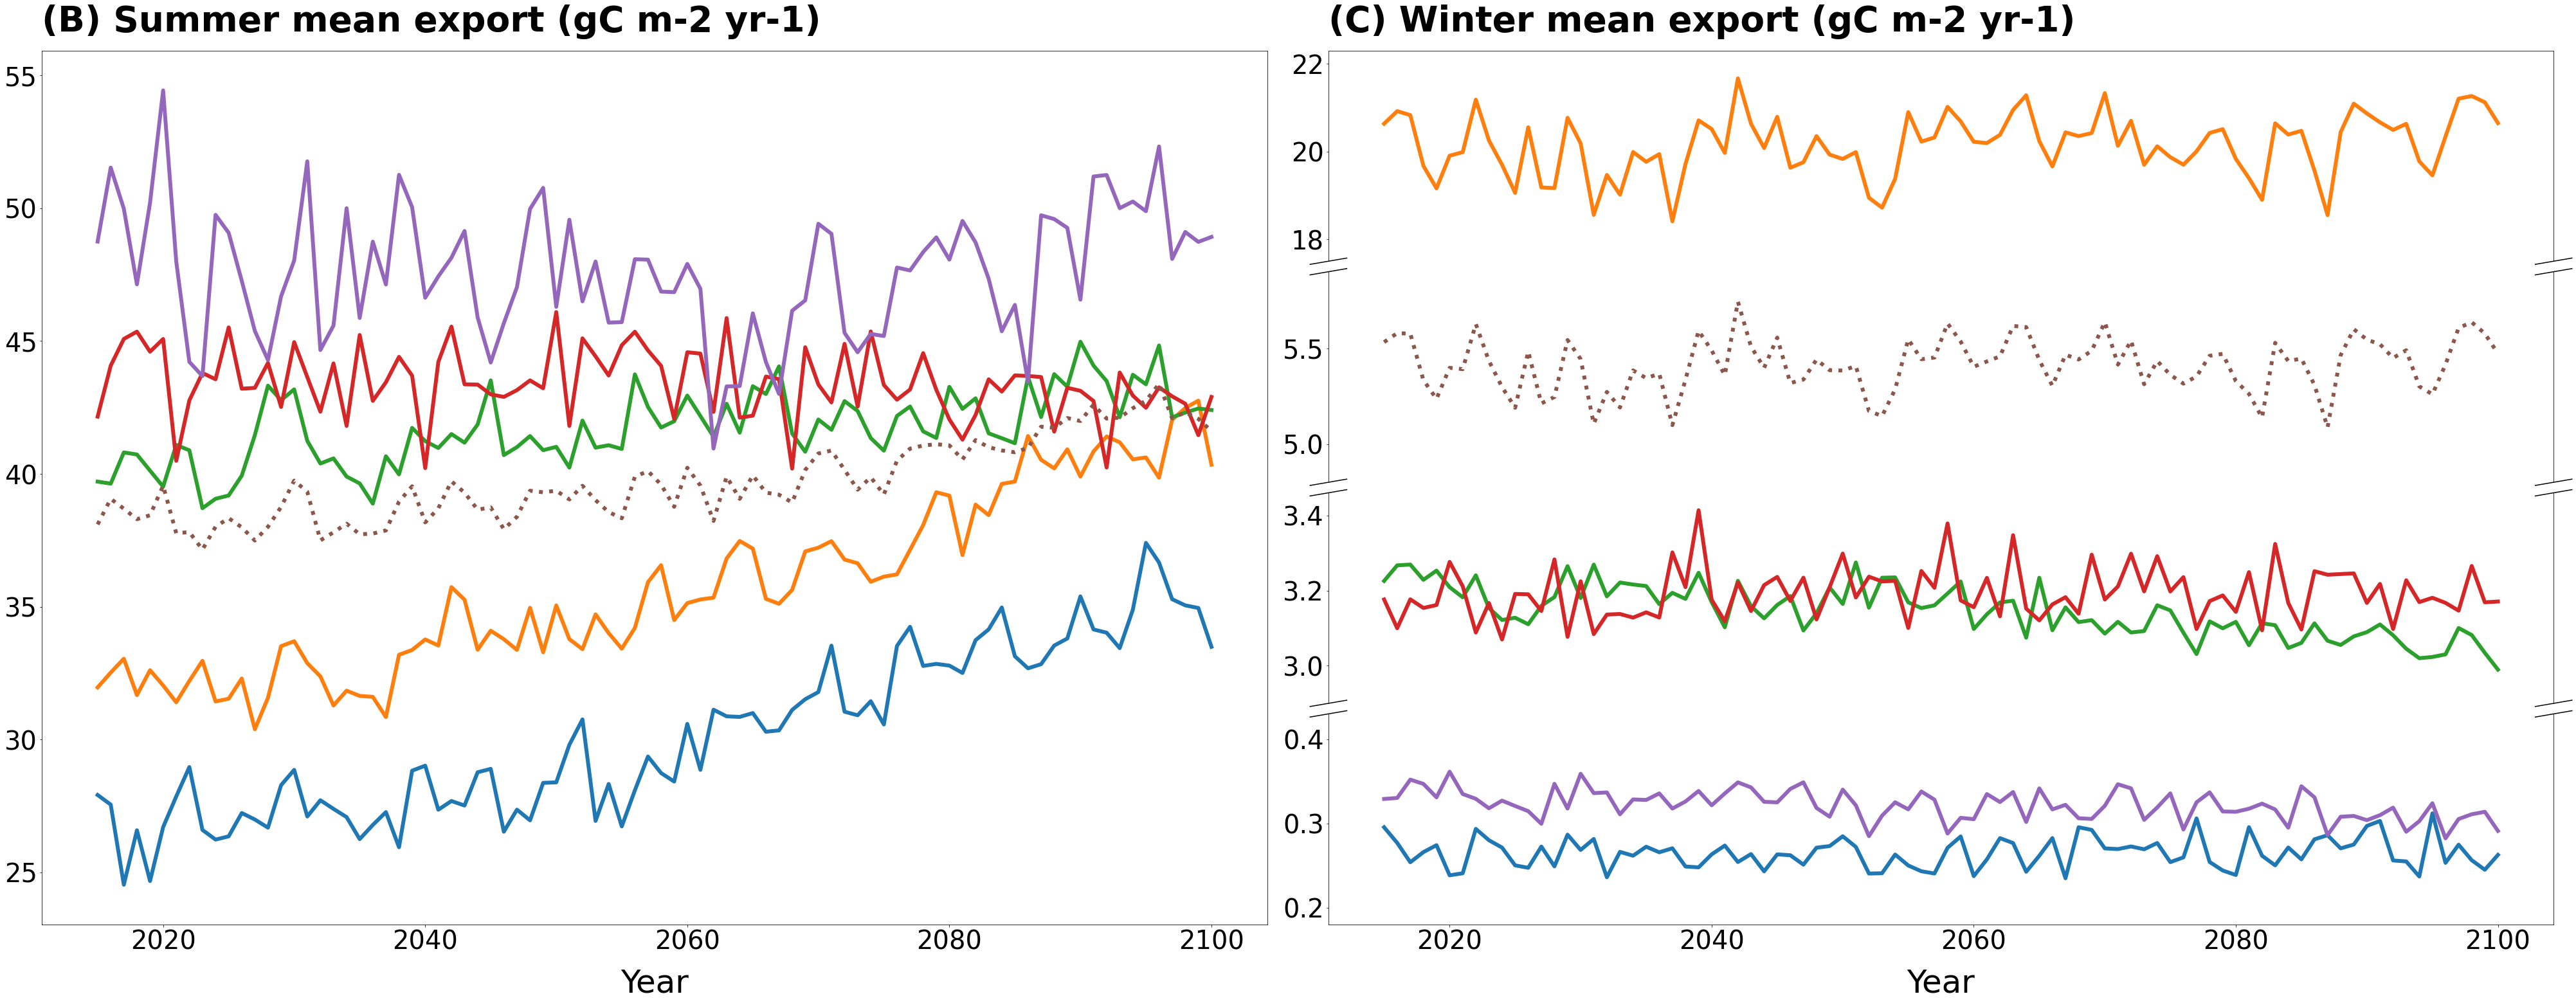

In [46]:
fig = plt.figure(constrained_layout=True, figsize=(70,25))
fig.subplots_adjust(hspace=0.05, wspace = 0.05)


gs = GridSpec(4, 2, figure=fig, height_ratios=[1,1,1,1])
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3,1])

ax1.set_title("(B) Summer mean export (gC m-2 yr-1)", fontweight = "bold", fontsize =55, pad = 30, loc = "left")

Summer.plot.line(ax = ax1, linewidth = 6, legend=False)
Summer_Mean.plot.line(ax = ax1, linewidth = 6, linestyle = ":", legend=False)
ax1.set_xlabel('Year', fontsize = 50, labelpad=20)


ax2.set_title("(C) Winter mean export (gC m-2 yr-1)", fontweight = "bold", fontsize = 55, pad = 30, loc = "left")

Winter.plot.line(ax = ax2, linewidth = 6, legend=False)
Winter.plot.line(ax = ax3, linewidth = 6, legend=False)
Winter_Mean.plot.line(ax = ax3, linewidth = 6, legend=False, linestyle = ":")
Winter.plot.line(ax = ax4, linewidth = 6, legend=False)
Winter.plot.line(ax = ax5, linewidth = 6, legend=False)
Winter_Mean.plot.line(ax = ax5, linewidth = 6, legend=False, linestyle = ":")
#ax5.legend(loc='lower left', bbox_to_anchor=(1.02, 0), prop={'size':45})
ax5.set_xlabel('Year', fontsize = 50, labelpad=20)


ax2.set_ylim(17.5, 22.3) 
ax2.yaxis.set_major_locator(mticker.MaxNLocator(3))
ax3.set_ylim(4.8, 5.9)
ax3.set_yticks([5.0, 5.5])
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(3))
ax4.set_ylim(2.9, 3.46)
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax4.yaxis.set_major_locator(mticker.MaxNLocator(3))
#ax4.set_yticks([3, 3.3])
ax5.set_ylim(0.18, 0.43)
ax5.yaxis.set_major_locator(mticker.MaxNLocator(3))
# ax5.yaxis.set_major_locator(mticker.MaxNLocator(2))

ax2.spines['bottom'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])
ax2.set(xlabel=None)
ax3.set(xlabel=None)
ax4.set(xlabel=None)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(40)
    
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(40)

for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set_fontsize(40)

for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
    label.set_fontsize(40)
    
for label in (ax5.get_xticklabels() + ax5.get_yticklabels()):
    label.set_fontsize(40)
    
d = .015  # how big to make the diagonal lines in axes coordinates (length of line)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal 
# (length along x axis starting d from the left edge of axis, height along y axis starting d from bottom of axis) 
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax3.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax4.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 


kwargs = dict(transform=ax4.transAxes, color='k', clip_on=False)
ax4.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax4.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax5.transAxes)  # switch to the bottom axes
ax5.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax5.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


plt.savefig("output/{}/{}_{}_{}_mean_projection_season.png".format(model, variable, model, experiment), bbox_inches='tight')
plt.show()

### Multimodel

In [111]:
Multimodel = Mean.merge(Summer_Mean, on = "Year", how='left')
Multimodel = Multimodel.merge(Winter_Mean, on = "Year", how= "left")
Multimodel

,Multimodel Mean_x,Multimodel Mean_y,Multimodel Mean
Year,,,
2015,17.711475,38.098599,5.532207
2016,18.131488,39.063451,5.579106
2017,17.974893,38.691460,5.576502
2018,17.703275,38.296919,5.333688
2019,17.627375,38.443955,5.235965
...,...,...,...
2096,20.069768,43.388318,5.415167
2097,19.761057,42.092028,5.606660
2098,19.846275,42.318593,5.636078


In [112]:
Multimodel = Multimodel.rename({'Multimodel Mean_x': 'Annual', 'Multimodel Mean_y': 'Summer', "Multimodel Mean" : "Winter"}, axis=1)
Multimodel

,Annual,Summer,Winter
Year,,,
2015,17.711475,38.098599,5.532207
2016,18.131488,39.063451,5.579106
2017,17.974893,38.691460,5.576502
2018,17.703275,38.296919,5.333688
2019,17.627375,38.443955,5.235965
...,...,...,...
2096,20.069768,43.388318,5.415167
2097,19.761057,42.092028,5.606660
2098,19.846275,42.318593,5.636078


In [113]:
Multimodel.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = True, header=True)

In [114]:
df = pd.read_csv("csv/{}_{}_whole.csv".format(model, variable))
df

,Year,Annual,Summer,Winter
0,2015,17.711475,38.098599,5.532207
1,2016,18.131488,39.063451,5.579106
2,2017,17.974893,38.691460,5.576502
3,2018,17.703275,38.296919,5.333688
4,2019,17.627375,38.443955,5.235965
...,...,...,...,...
81,2096,20.069768,43.388318,5.415167
82,2097,19.761057,42.092028,5.606660
83,2098,19.846275,42.318593,5.636078
84,2099,19.790175,42.073061,5.577116
